<!-- Logistic regression is a fundamental machine learning algorithm used for binary classification
problems. It's a statistical method that estimates the probability of an instance belonging to a particular class.
 
Despite its name, logistic regression is used for classification, not regression. In this presentation,
we'll build a logistic regression algorithm from scratch using Python, exploring its components and
implementation. -->

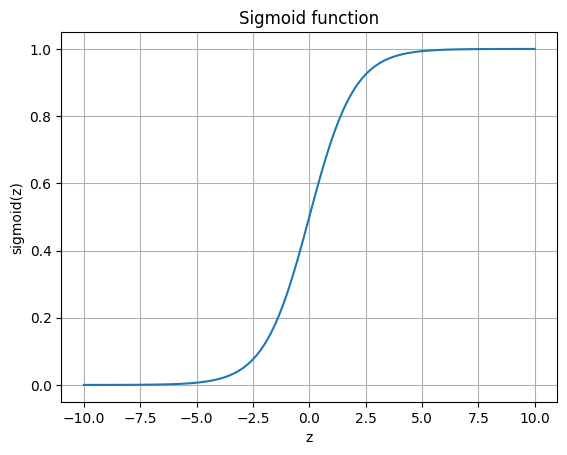

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


#plot sigmoid function
z = np.linspace(-10, 10, 100)
y = sigmoid(z)

plt.plot(z, y)
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()

In [2]:
""" The sigmoid Function
The sigmoid function is the heart of logistic regression. 
It maps any real-valued number to a value between 0 and 1, 
which can be interpreted as a probability. 
The sigmoid function is defined as sigma(z)
= 1 / (1 + e^(-z)), where z is the input and e is the
base of natural algorithms.
"""

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Example
z = 2
probability = sigmoid(z)
print(f"Sigmoid of {z} is {probability: .4f}")

Sigmoid of 2 is  0.8808


In [3]:
"""Hypothesis Function
In logistic regression, the hypothesis function combines the input features with the model
parameters (weights and bias) and passes the result through the sigmoid function. 
This gives us the predicted probability of the positive class.
"""

def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

#Example
X = np.array([[1, 2, 3], [4, 5, 6]])    # 2 samples, 3 features each 
theta = np.array([0.1, 0.2, 0.3])       # 3 weights
predictions = hypothesis(X, theta)
print("Predictions: ", predictions)

Predictions:  [0.80218389 0.96083428]


In [4]:
""" The Cost function
The cost function measures how well our model is
performing. For logistic regression, we use the log
loss (also known as cross-entropy loss). 
This function penalizes confident and wrong predictions
more than less confident ones.
"""

def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

#Example
X = np.array([[1, 2], [3, 4], [5,6]])
y = np.array([0, 1, 1])
theta = np.array([0.1, 0.2])
cost = cost_function(X, y, theta)
print(f"Cost : {cost:.4f}")

Cost : 0.4764


In [5]:
"""" Gradient Descent
Gradient descent is an optimization algorithm used
to find the values of parameters (theta) that minimize the cost function. 
It works by iteratively adjusting the
parameters in the direction of steepest decrease of
the cost function.
"""

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        h = hypothesis(X, theta)
        gradient = (1/m) * np.dot(X.T, (h-y))
        theta -= alpha * gradient
        J_history.append(cost_function(X, y, theta))

    return theta, J_history 

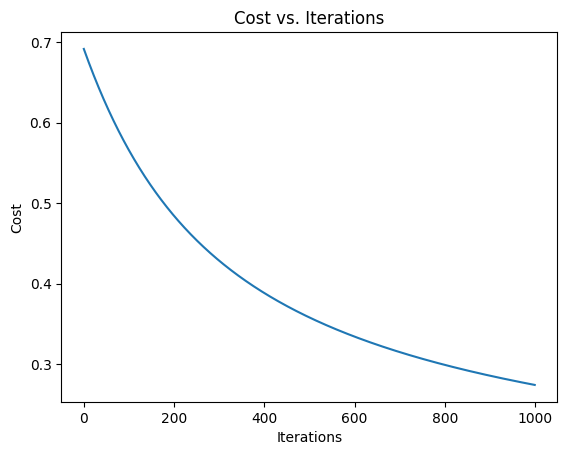

Final theta: [-0.19167336  1.25661241  1.40253888]


In [6]:
"""Training the Model
Now let's put it all together and train our logistic regression model. 
We'll use a simple dataset and visualize the cost decrease over iterations.
"""

# Generate some random data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize parameters
theta = np.zeros(3)

# Train the model
alpha = 0.01
num_iters = 1000
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plot cost vs iterations
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

print("Final theta:", theta)

In [7]:
""" Make predictions
Once we have trained our model and obtained the optimal parameters, 
we can use it to make predictions on new data.
"""

def predict(X, theta, threshold=0.5):
    return hypothesis(X, theta) >= threshold

#Example
X_new = np.array([[1, 0.1, 0.2], [1, -0.5, 1.5]])
# theta = np.array([0.1, 0.2, 0.3])
predictions = predict(X_new, theta)
probabilities = hypothesis(X_new, theta)

for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Sample {i+1}: Prediction = {pred}, Probability = {prob:.4f}")

Sample 1: Prediction = True, Probability = 0.5534
Sample 2: Prediction = True, Probability = 0.7831


In [8]:
"""Model Evaluation
To evaluate our model's performance, we can use
metrics such as accuracy, precision, recall, and F1-
score. Here's how to calculate accuracy:
"""

def accuracy(X, y, theta):
    # X = np.array([[1, 2], [3, 4], [5,6]])
    # theta = np.array([0.1, 0.2])
    predictions = predict(X, theta)
    return np.mean(predictions == y)

#Calculate the accuracy on training data
train_accuracy = accuracy(X, y, theta)
print(f"Training accuracy: {train_accuracy:.4f}")

Training accuracy: 0.9700


In [9]:
"""Regularization
Regularization helps prevent overfitting by adding a penalty term to the cost function. 
L2 regularization (also known as Ridge) is commonly used in logistic regression.
"""

def cost_function_regularized(X, y, theta, lambda_):
    m = len(y)
    h = hypothesis(X, theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h)) + reg_term
    return cost

def gradient_descent_regularized(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)
    J_history = []
    
    for _ in range(num_iters):
        h = hypothesis(X, theta)
        gradient = (1/m) * np.dot(X.T, (h - y))
        gradient[1:] += (lambda_ / m) * theta[1:]
        theta -= alpha * gradient
        J_history.append(cost_function_regularized(X, y, theta, lambda_))
    
    return theta, J_history

# Example usage (continuation from previous slides)
lambda_ = 0.1
theta_reg, J_history_reg = gradient_descent_regularized(X, y, theta, alpha, num_iters, lambda_)

In [10]:
""""Feature Scaling
Feature scaling is crucial for the efficient performance of logistic regression.
It ensures that all features contribute equally to the result and helps the gradient descent algorithm converge faster.
"""

def feature_scaling(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Example
X_raw = np.array([[1, 1000], [2, 2000], [3, 3000]])
X_scaled = feature_scaling(X_raw)

print("Raw features:")
print(X_raw)
print("\nScaled features:")
print(X_scaled)

Raw features:
[[   1 1000]
 [   2 2000]
 [   3 3000]]

Scaled features:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [11]:
"""Multiclass Classification
While logistic regression is inherently binary, 
we can extend it to multiclass problems using the one-vs-rest (OvR) approach. 
Here's a simple implementation:
"""

def one_vs_rest(X, y, num_classes, alpha, num_iters):
    n_features = X.shape[1]
    thetas = np.zeros((num_classes, n_features))
    
    for i in range(num_classes):
        y_binary = (y == i).astype(int)
        theta = np.zeros(n_features)
        theta, _ = gradient_descent(X, y_binary, theta, alpha, num_iters)
        thetas[i] = theta
    
    return thetas

def predict_multiclass(X, thetas):
    probabilities = np.array([hypothesis(X, theta) for theta in thetas])
    return np.argmax(probabilities, axis=0)

# Example (assuming X and y are prepared for multiclass)
num_classes = 3
thetas_multiclass = one_vs_rest(X, y, num_classes, alpha, num_iters)
predictions_multiclass = predict_multiclass(X, thetas_multiclass)

In [12]:
""" Real-Life Example: Spam Detection
Logistic regression can be used for spam detection in emails.
Features might include word frequencies, presence of certain phrases, or email metadata.
"""

# Simplified example (binary classification)
# Features: [bias, contains_urgent, num_capital_letters, num_links]
X_emails = np.array([
    [1, 0, 5, 1],   # Not spam
    [1, 1, 15, 3],  # Spam
    [1, 0, 3, 0],   # Not spam
    [1, 1, 10, 5]   # Spam
])
y_emails = np.array([0, 1, 0, 1])

theta_spam = np.zeros(4)
theta_spam, _ = gradient_descent(X_emails, y_emails, theta_spam, 0.1, 1000)

new_email = np.array([[1, 1, 8, 2]])
spam_probability = hypothesis(new_email, theta_spam)
print(f"Probability of being spam: {spam_probability[0]:.4f}")


Probability of being spam: 0.8129


In [ ]:
"""Real-Life Example: Medical Diagnosis
Logistic regression can assist in medical diagnosis, 
such as predicting the likelihood of a disease based on various symptoms and test results.
"""

# Features: [bias, age, blood_pressure, cholesterol, bmi]
X_patients = np.array([
    [1, 45, 120, 200, 25],
    [1, 60, 140, 240, 30],
    [1, 35, 110, 180, 22],
    [1, 55, 130, 220, 28]
])
y_heart_disease = np.array([0, 1, 0, 1])

theta_heart = np.zeros(5)
theta_heart, _ = gradient_descent(X_patients, y_heart_disease, theta_heart, 0.01, 1000)

new_patient = np.array([[1, 50, 135, 210, 27]])
heart_disease_risk = hypothesis(new_patient, theta_heart)
print(f"Risk of heart disease: {heart_disease_risk[0]:.4f}")